In [27]:
from sklearn.datasets import make_moons
import numpy as np

In [28]:
x,y = make_moons(n_samples=500, noise = 0.3, random_state=42)

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

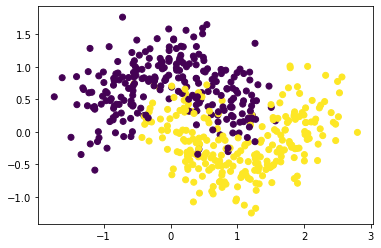

In [30]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

In [31]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
log_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
svc_clf = SVC(probability=True,random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [34]:
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('sv',svc_clf),('dt', dt_clf),('rf', rf_clf)], voting='soft')

In [35]:
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('sv',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  deci...
                                                     criterion='gini',
    

In [36]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,svc_clf,dt_clf,voting_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.85
SVC 0.87
DecisionTreeClassifier 0.82
VotingClassifier 0.88


In [37]:
from sklearn.ensemble import BaggingClassifier

In [38]:
bg_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples = 100 ,n_jobs=-1)

In [39]:
bg_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [40]:
y_pred = bg_clf.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred)

0.9

In [51]:
def plot_decision_boundry(clf, x,y,axes  = [-1.5,2,-1,1.5],alpha = 0.5, contour = True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    x_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    plt.contourf(x1,x2, y_pred, alpha = 0.3, lw = 10)

    plt.plot(x [:,0][y==0],x[:,1][y==0],'yo', alpha = alpha)
    plt.plot(x [:,0][y==1],x[:,1][y==1],'ro', alpha = alpha)

ipykernel_launcher:7: UserWarning: The following kwargs were not used by contour: 'lw'


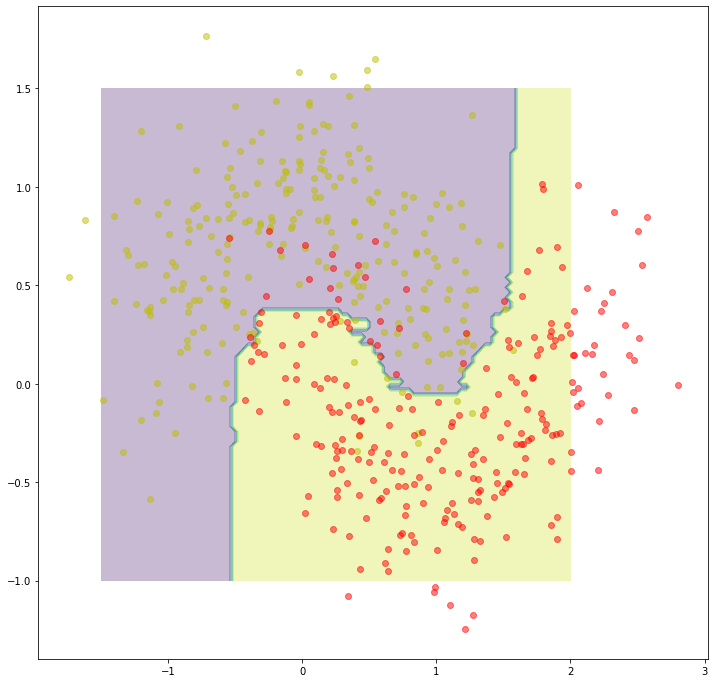

In [54]:
plt.figure(figsize = (12,12))
plot_decision_boundry(bg_clf,x,y)

ipykernel_launcher:7: UserWarning: The following kwargs were not used by contour: 'lw'


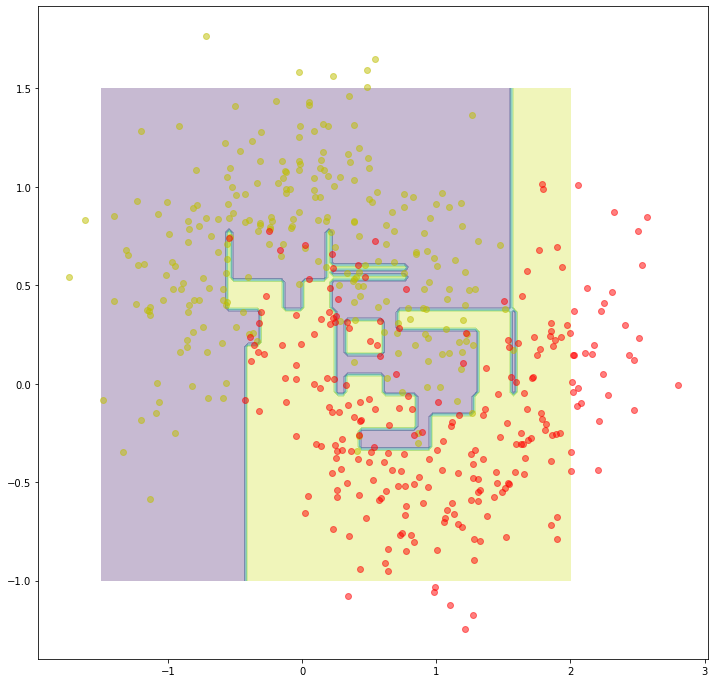

In [55]:
plt.figure(figsize = (12,12))
plot_decision_boundry(dt_clf,x,y)